# Tópico I: Rotação

Inicialmente, converta a imagem chelsea de rgb para tons de cinza (obtendo f). Após a conversão, aplique em f uma rotação de 30 graus no sentido horário. Tome o (0,0) como origem. Você deve obter o resultado abaixo:

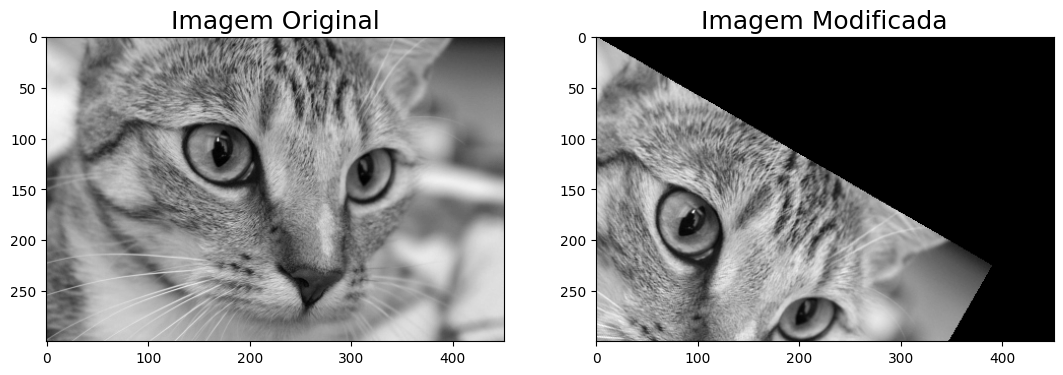

### Célula 1: escreva seu código abaixo e plote as imagens.

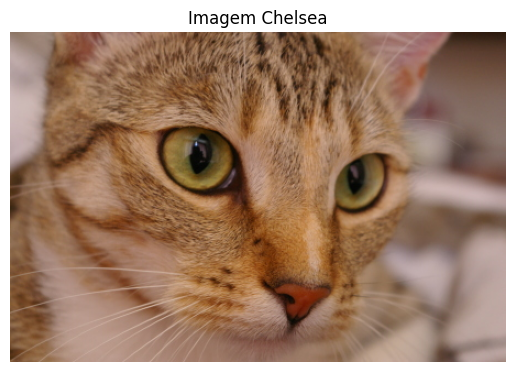

In [209]:
import matplotlib.pyplot as plt
from skimage import data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Carregando a imagem da internet
from PIL import Image
import requests

# Carrega a imagem "cat"
cat_image = data.cat()

# Plota a imagem
plt.imshow(cat_image, cmap='gray')
plt.axis('off')
plt.title("Imagem Chelsea")
plt.show()


In [210]:
# Salvando a imagem no drive
import numpy as np
cat_image  = np.array(cat_image )
Image.fromarray(cat_image ).save('/content/chelsea.jpg')

In [211]:
# Informações sobre as dimensões das imagens
from skimage.io import imread
cat_image  = imread('chelsea.jpg')
print('Dimensões de f: ',cat_image .shape)

from skimage.color import rgb2gray
cat_image  = rgb2gray(cat_image )
print('Dimensões de f: ',cat_image .shape)

Dimensões de f:  (300, 451, 3)
Dimensões de f:  (300, 451)


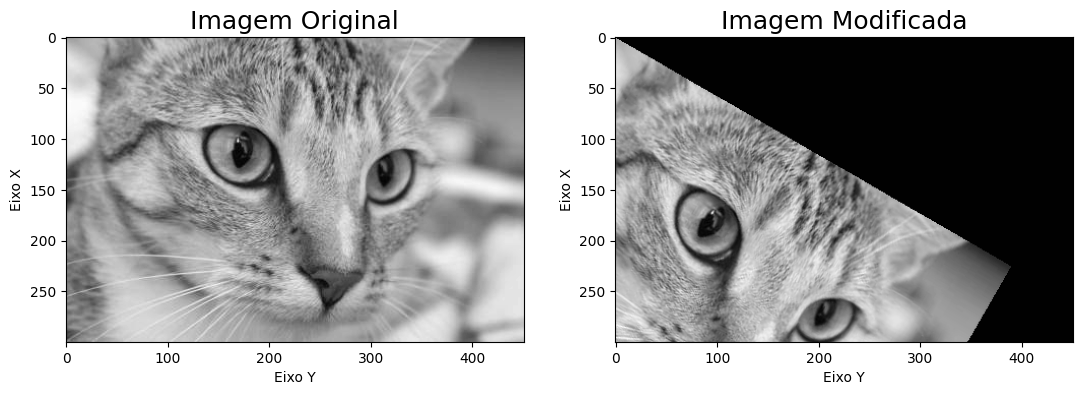

In [212]:
from scipy import ndimage as ndi
import matplotlib.pylab as pylab

cat_image = imread('chelsea.jpg')
cat_image = rgb2gray(cat_image)

# Setando angulação
graus = 30 # Sentido horário
radianos = graus * (np.pi / 180)
theta = radianos

mat_rotate = np.array([[np.cos(theta),-np.sin(theta),0],
                       [np.sin(theta),np.cos(theta),0],
                       [0,0,1]])

g = ndi.affine_transform(cat_image, mat_rotate)

# Plotando o resultado
fig, axes = pylab.subplots(ncols=2, figsize=(13,6))

# Configurando o plot da imagem original
axes[0].set_title('Imagem Original', size=18)
axes[0].imshow(cat_image, cmap = 'gray');
axes[0].set_xlabel('Eixo Y');
axes[0].set_ylabel('Eixo X');

# Configurando o plot da imagem reescalada
axes[1].set_title('Imagem Modificada', size=18)
axes[1].imshow(g, cmap = 'gray');
axes[1].set_xlabel('Eixo Y');
axes[1].set_ylabel('Eixo X');

# Tópico II: Equalização de histogramas

### Célula 1: Carregue a imagem do cachorro conforme a célula abaixo

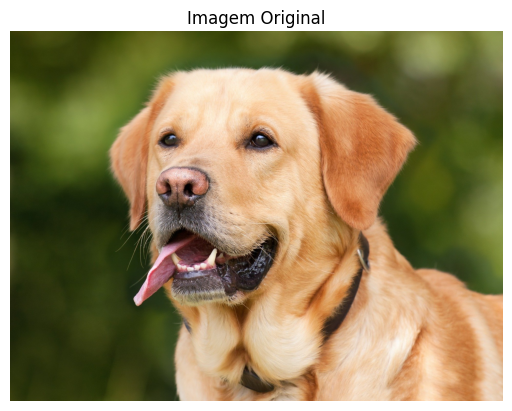

In [213]:
# Importações
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
from skimage.exposure import equalize_hist

url = "https://3c1703fe8d.site.internapcdn.net/newman/gfx/news/hires/2018/2-dog.jpg"
dog = Image.open(requests.get(url, stream=True).raw)

# Plotando a imagem
plt.title('Imagem Original')
plt.imshow(dog)
plt.axis('off')
plt.show()

# Salvando a imagem
dog = np.array(dog)
Image.fromarray(dog).save('/content/cachorro.jpg')

dog_image = imread('cachorro.jpg')

#### Imagem esperada

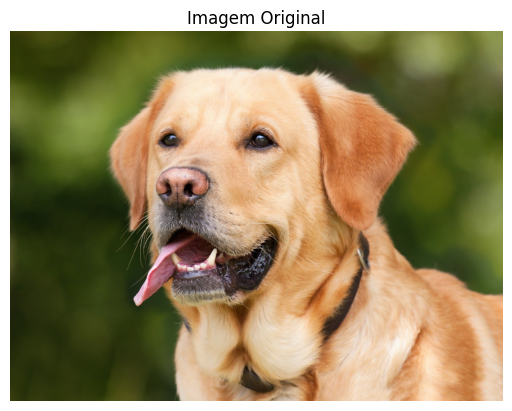

### Célula 2: Carregue a função necessária para plotar o histograma

In [214]:
def plot_hist(img):
             colors = ['r', 'g', 'b'];

             for i in range(3):
              hist, bins = np.histogram(img[...,i].flatten(),256,[0,256]);
              binWidth = bins[1] - bins[0];

              plt.bar(bins[:-1], hist*binWidth, binWidth, label='hist ({})'.format(colors[i]));

              plt.xlim([0,256]);
              plt.xlabel('Intervalo')
              plt.ylabel('Frequência')
              plt.legend(loc = 'upper left');
              plt.title('Histograma')
             return

### Célula 3: Crie um array da imagem de interesse (Completar)

In [215]:
# Carregar a imagem
img = Image.open('cachorro.jpg')

# Converter a imagem para um array numpy
img_array = np.array(img)


### Célula 4: Plote o histograma original da imagem original (a partir do array criado anteriormente/Completar)

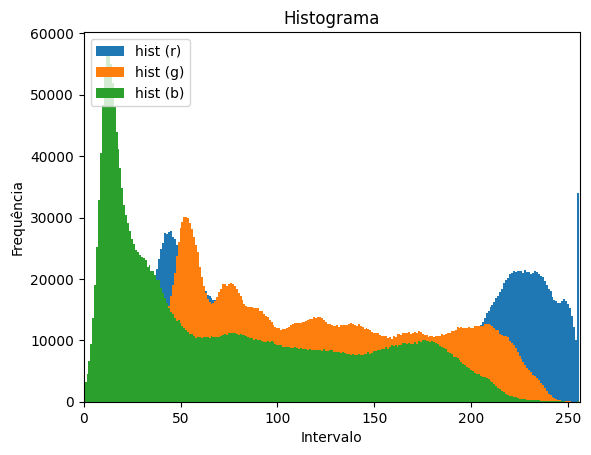

In [216]:
plot_hist(img_array)

#### Resultado esperado:

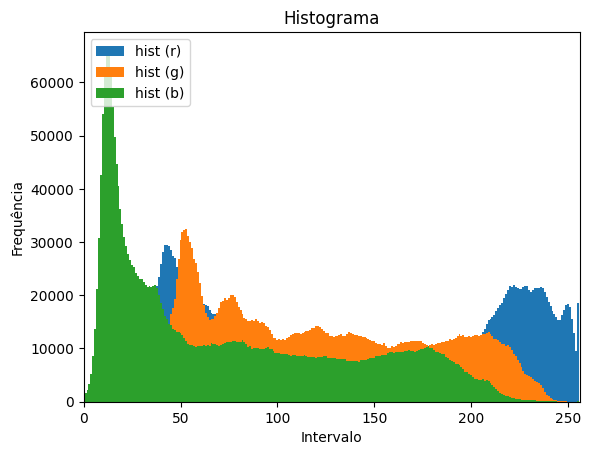

### Célula 5: Aplique a equlalização através da equalize_hist conforme discutido em aula (Completar)

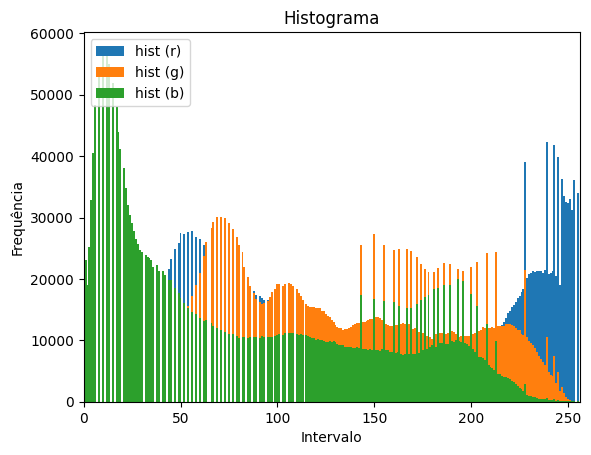

In [235]:
# Importação de bibliotecas
import numpy as np
import matplotlib.pylab as plt
from skimage.exposure import equalize_hist
from skimage import data
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import equalize_hist
from google.colab.patches import cv2_imshow

img = cv2.imread('cachorro.jpg', cv2.COLOR_RGB2BGR)

equ1 = (255*equalize_hist(dog_image)).astype(np.uint8);
plot_hist(equ1);

#### Resultado esperado:

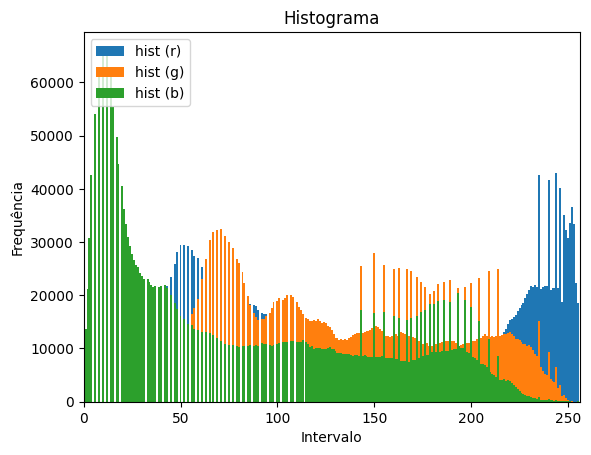

### Célula 6: Plote a imagem original e a imagem equalizada

#### Resultado esperado

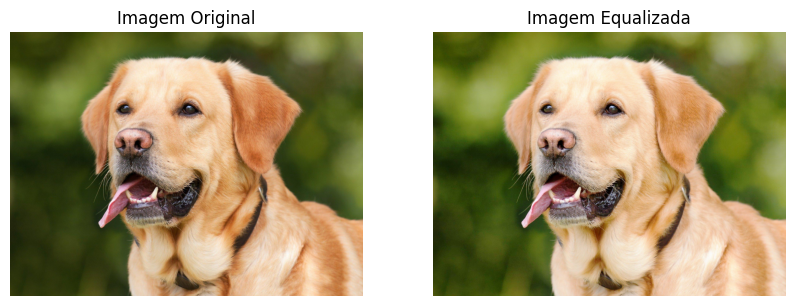

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from PIL import Image

def plot_images(img_original, img_equalized):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img_original)
    axes[0].set_title('Imagem Original')
    axes[0].axis('off')

    axes[1].imshow(img_equalized)
    axes[1].set_title('Imagem Equalizada')
    axes[1].axis('off')

    plt.show()

# Carregar a imagem usando PIL
img_path = 'cachorro.jpg'
img = Image.open(img_path)
img_array = np.array(img)

equ1 = (255*equalize_hist(dog_image)).astype(np.uint8);

# Plotar a imagem original e a imagem equalizada
plot_images(img_array, equ1)


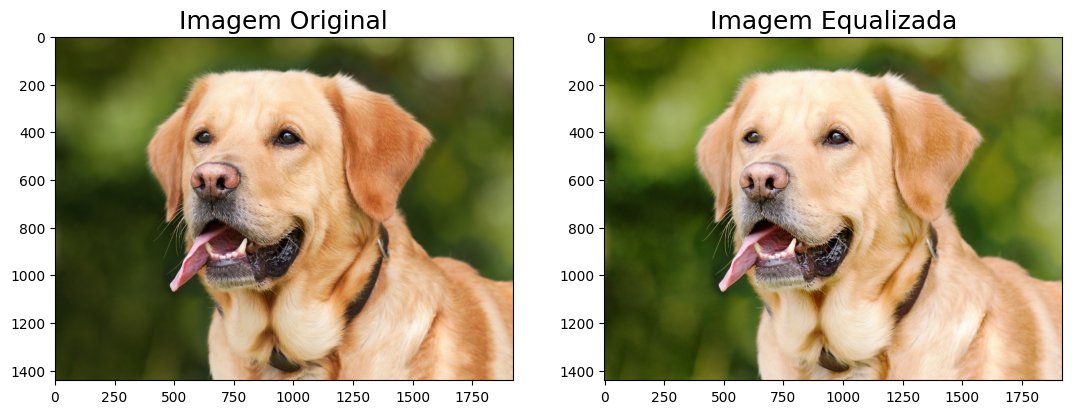

# Tópico III: Transferência de Cores

### Célula 1: instale o pacote colortrans

In [219]:
# Instalação do pacote colortrans
!pip install colortrans

### Célula 2: Faça as importações necessárias (Completar)

In [220]:
# Importações
import numpy as np
from PIL import Image
from skimage import data
import cv2
from google.colab.patches import cv2_imshow
import colortrans


### Célula 3: Carregue e plote a imagem 1 (Completar)

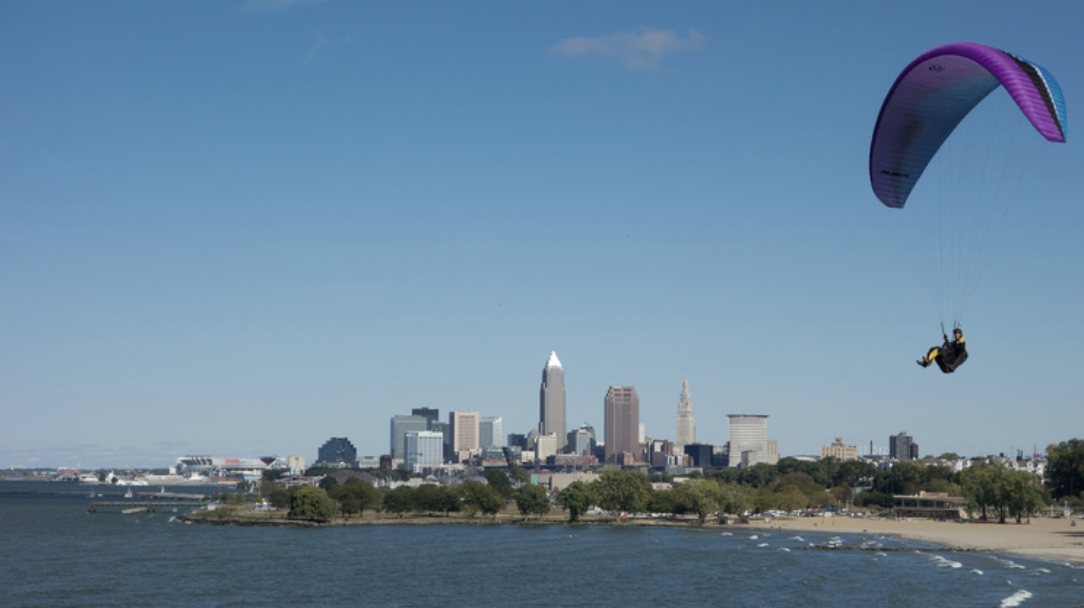

In [221]:
im_1 = np.array(Image.open('/content/imagem_1.png'))
im_1 = cv2.cvtColor(im_1, cv2.COLOR_BGR2RGB)
cv2_imshow(im_1)

### Célula 4: Carregue e plote a imagem 2 (Completar)

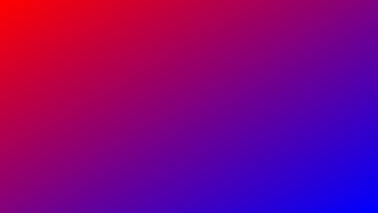

In [222]:
# Plotando a segunda imagem
im_2 = np.array(Image.open('/content/imagem_2.png'))
im_2 = cv2.cvtColor(im_2, cv2.COLOR_BGR2RGB)
cv2_imshow(im_2)

### Célula 5: Aplique a transferência de cores onde a imagem 1 é a de conteúdo e a imagem 2 é a de referência. Por fim, plote o resutado. (Completar)

In [223]:
# Carregando as imagens
content = np.array(Image.open('/content/imagem_1.png').convert('RGB'))

# Imagem de estilo
reference = np.array(Image.open('/content/imagem_2.png').convert('RGB'))

# Transfer colors using different algorithms
output_lhm = colortrans.transfer_lhm(content, reference)

# Save outputs
Image.fromarray(output_lhm).save('/content/output_lhm.jpg')

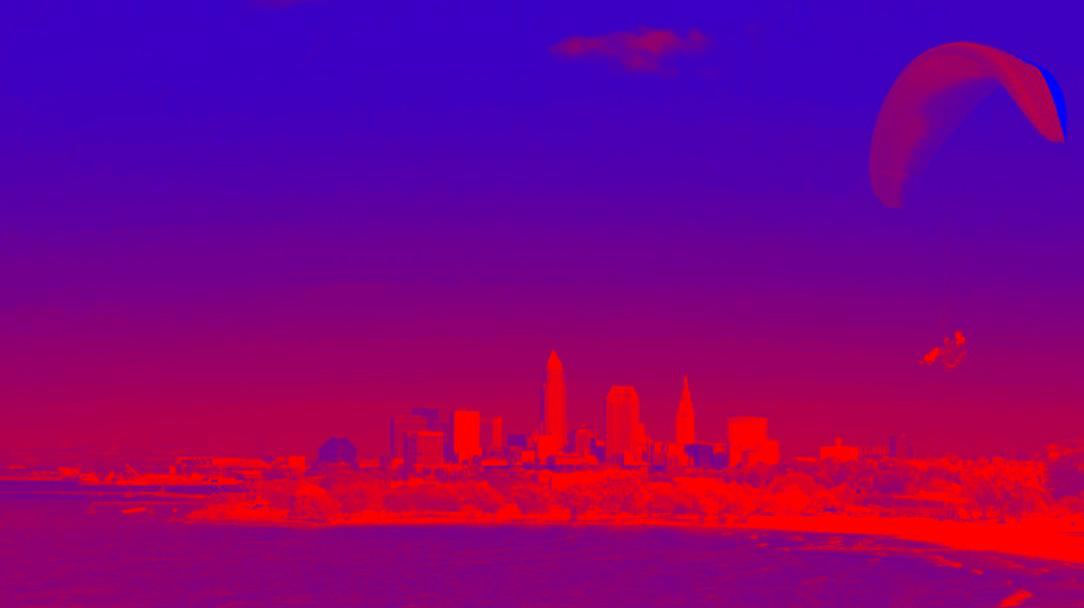

In [224]:
# Plotando a terceira imagem
im_3 = np.array(Image.open('/content/output_lhm.jpg'))
im_3 = cv2.cvtColor(im_3, cv2.COLOR_BGR2RGB)
cv2_imshow(im_3)

#### Resultado esperado:

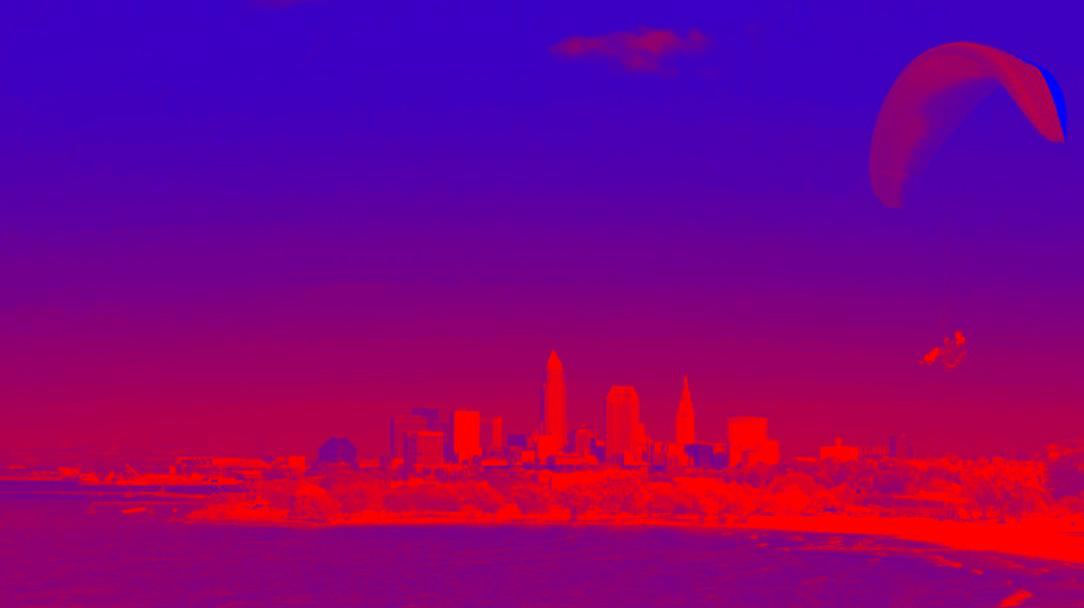